#### Matthew Jehrio
#### MTH 448
#### 5/13/2018

# Collection and Analysis of Buffalo Marathon Results 

## Introduction

Over the past few decades, marathon running has experienced a significant boom in popularity. Not only have the number of finishers increased dramatically, but the number of official races being held has also significantly expanded. While we have fairly well documented results regarding trends in marathon running in an aggregate sense, it is interesting to consider these trends on a more grassroots level. That is to say, instead of looking at marathons across the United States, consider looking more closely at one specific marathon event over time to see how a certain subset of these trends. This report will focus on the Buffalo Marathon from 2001 to 2017 and will seek to answer three questions: What are the trends in the Buffalo Marathon, What are the characteristics of each marathon's results, and what can we infer from this data? For this report, we will collect data from https://www.athlinks.com/ 

### Foreword on the collection of data

The data on the athlinks website is organized as individual webpages containing a certain portion of the results for each race in a given year. The HTML for each of these pages was saved to a text file manually.The attached file containing this data should include a folder for each year the Buffalo Marathon was run between 2001 and 2017. Each of these folders contains .txt files with the HTML for each page of results from the athlinks site. The years 2001-2017 were chosen because that is the most recent and continuous set of data, as there are breaks in the data before 2001. This report is built around two separate groups of functions, one to scrape the webpages for which the results include the runners' bib numbers and another that scrapes webpages where this data is not present. The code itself that scrapes and aggregates these results is included and explained in comments in the code appendix, but is not included here because it is cumbersome and does not really illustrate a point. As a note on the data itself, the Overall Rank, Gender Rank, and Age Group Rank may not be entirely correct, but it does not matter as we are looking at the results in aggregate. Also, the cities are the places the runners come from. While the scraping function correctly extracts this data, it should be noted that the original data were entered as a field and not as a selection from a list of options. As such, there are a non trivial number of permutations on the spelling and formatting of any given city.  There are also many runners who elected not to enter this field. As such the data for the cities is included in the code appendix as something that might be fun to look at, but is not very meaningful in analysis due to it's incompleteness.

## Summary Statistics

With the data loaded into memory with the help of the code from the appendix, we can start to ask questions and see what is happening with these race results. As a first step, we can see in general terms how popular the Buffalo Marathon is by plotting how many people participated each year:

Text(0.5,1,'Number of Runners for Each Race Year')

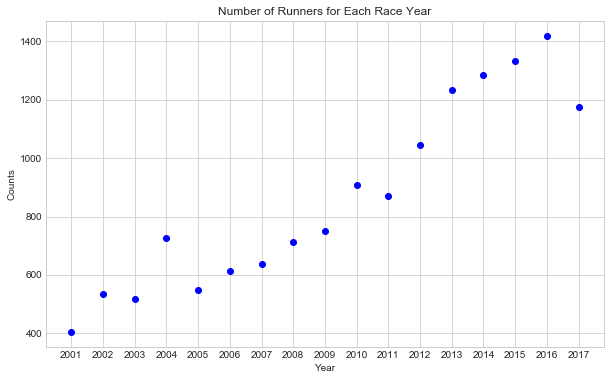

In [20]:
# visualizes how many runners there are for each year
figure(figsize=(10,6))
plot(counts,'b.',ms=12)
xticks(x,race_years)
xlabel('Year')
ylabel('Counts')
title('Number of Runners for Each Race Year')

The number of runners appears to grow fairly steadily, with some outliers, particularly in 2017. Also of note is the fact that between 2001 and 2016, participation in the Buffalo Marathon increased by over 300%, indicating that, at least in this locale, marathon running became much more popular relatively quickly. Moreover, the trend appears to be fairly strong and consistent, suggesting that there are certain factors driving this growth beyond any kind of natural variation.

Moving on to other statistics about the data, we can also visualize statistics about the data itself:

Text(0.5,1,'Standard Deviation of Each Race Year')

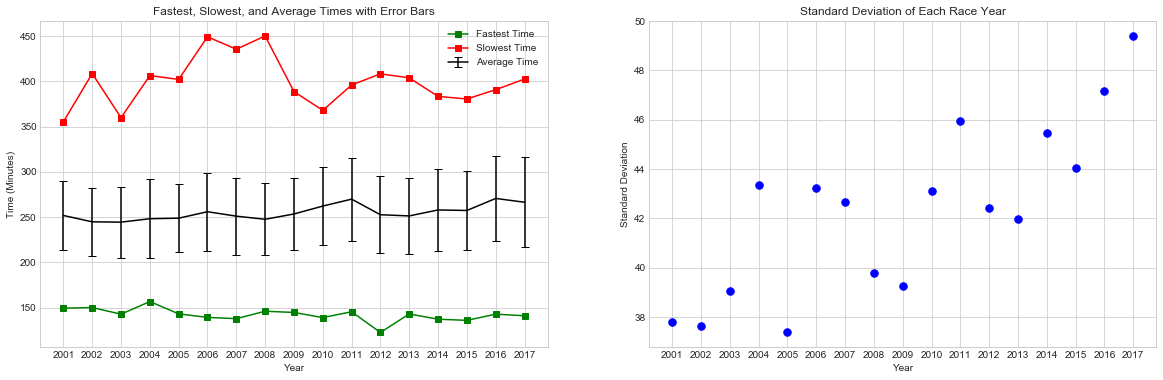

In [21]:
sb.set_style('whitegrid')
figure(figsize=(20,6))
subplot(1,2,1)
plot(mins,'gs',linestyle='solid',label='Fastest Time')
plot(maxs,'rs',linestyle='solid',label='Slowest Time')
errorbar(x,avgs,yerr=sds,color='k',label='Average Time',capsize=4)
legend()
xticks(x,race_years)
xlabel('Year')
ylabel('Time (Minutes)')
title('Fastest, Slowest, and Average Times with Error Bars')
subplot(1,2,2)
plot(sds,'b.',ms=15)
xticks(x,race_years)
xlabel('Year')
ylabel('Standard Deviation')
title('Standard Deviation of Each Race Year')

Here we see a few different things. The plot on the left displays the fastest, slowest, and average times with the error bars on the average values in the middle representing the standard deviation for the finishing times in a particular year. It appears as though both the average times and the fastest times are, relatively speaking, fairly constant. The fastest times seem to get slightly lower over time while the average times creep up slightly. The slowest times, however, look to have the greatest variation. Moreover, the slowest times tend to not follow the same pattern as the average and fastest times, i.e. the average and fastest times have roughly the same shape, or at least roughly increase or decrease on the same years. This tends to suggest that while the fastest runners are, by and large, impacted proportionally to the factors that push the average up or down, slower runner's times are more heavily influenced by who's actually running and the runner's individual preparation. The plot on the right displays the standard deviations for each race year. What is important to note here is that the scale is altered. Even though the standard deviation of the finishing times appears to increase over time, when put into scale like the error bars on the left plot show, they are actually closer than the right plot would imply. However, given that these races have hundreds of people in them, an increase in standard deviation by 12 minutes suggests that the more recent races had runners from a more diverse training background, while the runners who were running earlier races were, in and of themselves, sampled from a more closely clustered population of runners.

## Distributions

We now move into looking at the distribution of the finishing times. As a first start, we look at the distribution of all of the finishing times if we pooled all the race years together:

The mean = 256.752959967


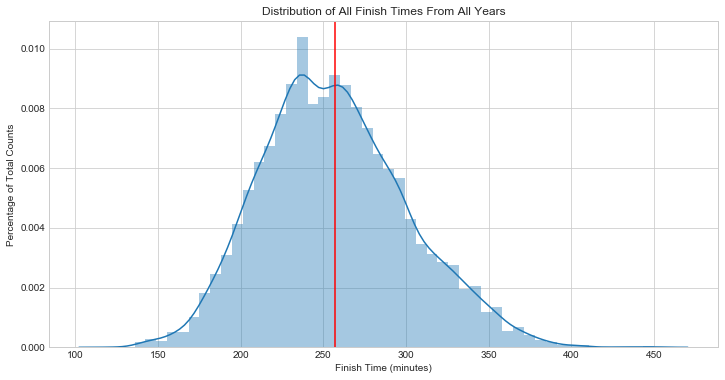

In [22]:
# Distribution of all finish times 
# from all races
figure(figsize=(12,6))
sb.distplot(all_races['time'].dropna(how='any'))
title('Distribution of All Finish Times From All Years')
xlabel('Finish Time (minutes)')
ylabel('Percentage of Total Counts')
a = all_races['time'].dropna(how='any').describe()[1] 
print('The mean = '+str(a))
axvline(a,color='r')

From this plot we can see that, over the course of all the runners that have run the Buffalo Marathon since 2001, the average finish time is ~256.75 minutes, which is approximately 4 hours and 17 minutes. There appears to be two peaks on this graph near the average. This is interesting because, if the assumptions of using the Central Limit Theorem hold, we should expect this curve to approach a normal distribution. However, even with all of the finishing times from all of the races from 2001, there are still two peaks that remain. This suggests that the assumptions of the Central Limit Theorem do not hold, and that the actual results we are getting are being generated not by sampling from one distribution, but two. The obvious guess is that the population of male runners that could have run in these races is distinct enough from that of the population of all female runners that could have run these races that it produces a noticeable difference in the total distribution.

Text(0,0.5,'Percentage of Total Counts')

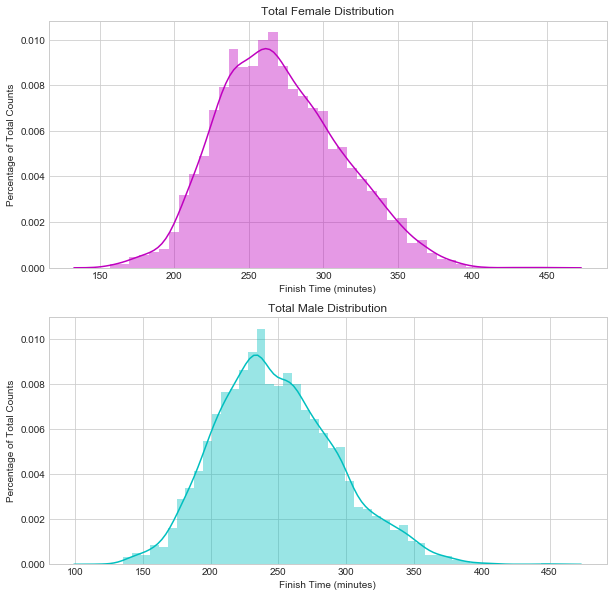

In [23]:
males = all_races[all_races['gender']=='M']
females = all_races[all_races['gender']=='F']
figure(figsize=(10,10))
subplot(2,1,1)
sb.distplot(females['time'].dropna(how='any'),color='m')
title('Total Female Distribution')
xlabel('Finish Time (minutes)')
ylabel('Percentage of Total Counts')
subplot(2,1,2)

sb.distplot(males['time'].dropna(how='any'),color='c')
title('Total Male Distribution')
xlabel('Finish Time (minutes)')
ylabel('Percentage of Total Counts')


So by carefully looking at the axes, these plots show that gender differences do, in fact play the most important role in creating these twin-peak situations. There still are some irregularities in these gender separated distributions, but they are comparatively minor.

It is also useful to look at the distributions for each individual race year:

count    8054.000000
mean      248.945507
std        44.327012
min       122.616667
25%       217.262500
50%       244.841667
75%       277.466667
max       450.000000
Name: time, dtype: float64

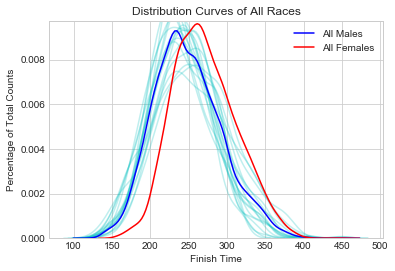

In [24]:
# Visualization of the distributions
# of times from each race as well as
# the aggregated races

ld = 0
for race_dist in races:
    #print(type(race_dist))
    ml = race_dist[race_dist['gender']=='M']
    ld = ml['time'].dropna(how='any')
    sb.kdeplot(ld,color='c',alpha=.25,label='')
    xlabel('')
    ylabel('')
    #title(str(race_years[ld]+2000))
    ld += 1
sb.kdeplot(males['time'].dropna(how='any'),color='b',label='All Males')
sb.kdeplot(females['time'].dropna(how='any'),color='r',label='All Females')
title('Distribution Curves of All Races')
xlabel('Finish Time')
ylabel('Percentage of Total Counts')
males['time'].describe()

The above plot shows the distribution of male finish times in each race in cyan. The reason that cyan is not on the legend is because the legend itself would take up more space than the plot itself with all of the values printed. The solid blue line indicates the distribution for all of the males across all races. The red line indicates the distribution of all the female entries in all of the races. It is included to show how each component influences the total distribution seen earlier. 

Conversely, looking at the female distributions for each race gives us

count    4931.000000
mean      270.966356
std        41.326807
min       156.500000
25%       240.575000
50%       267.133333
75%       298.425000
max       449.083333
Name: time, dtype: float64

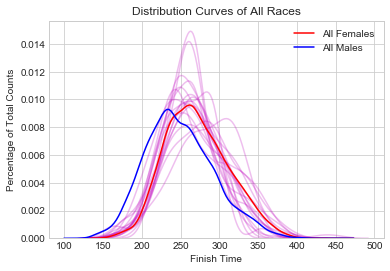

In [25]:
# Visualization of the distributions
# of times from each race as well as
# the aggregated races

ld = 0
for race_dist in races:
    #print(type(race_dist))
    fl = race_dist[race_dist['gender']=='F']
    ld = fl['time'].dropna(how='any')
    sb.kdeplot(ld,color='m',alpha=.25,label='')
    xlabel('')
    ylabel('')
    #title(str(race_years[ld]+2000))
    ld += 1
sb.kdeplot(females['time'].dropna(how='any'),color='r',label='All Females')
sb.kdeplot(males['time'].dropna(how='any'),color='b',label='All Males')
title('Distribution Curves of All Races')
xlabel('Finish Time')
ylabel('Percentage of Total Counts')
females['time'].describe()

Again, the blue is all male finishers, red is all female finishers, and magenta is the distribution for women for each year

As far as summary statistics are concerned, males in general averaged about 20 minutes faster than women, but also had a slightly higher standard deviation.

For a lot of these split distributions, there is a lot of variation. This is especially true for the earlier races that had far fewer runners than the later races, which tends to lead to less predictable results and a general breakdown of being able to approximate things quite as well. Nevertheless, for many of these split distributions, there is still a distinct peak for men and women separately that is a critical factor in this twin-peak phenomenon. Perhaps if we were to further subdivide these data we could tease out even more telling relationships that would, in part, explain the more irregularly shaped distributions. It also could be the case that there just isn't enough data for theorems like the Central Limit Theorem to hold.

## Quantile-Quantile plots

We now move on to what is largely a direct corollary of the above distribution plots. Our objective is to see how close to a normal distribution these distributions are. For this we introduce the Quantile-Quantile plot, whereby the quantiles of the data in a given set are plotted against the quantiles of a normal distribution.

C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Text(0.5,1,'Quantile-Quantile Plot of Every Time From Every Race')

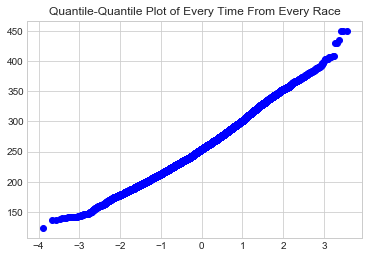

In [26]:
sp.probplot(all_races['time'],dist='norm',plot=matplotlib.pyplot)
xlabel('')
ylabel('')
title('Quantile-Quantile Plot of Every Time From Every Race')

The interpretation here is that the closer the blue dots fall on the red line, the closer the test distribution is to the normal distribution. In this particular example, the red line is almost entirely hidden by the points because all of the points fit the normal distribution so well. However, if we see how well each individual race compares to a normal distribution, we have:

C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


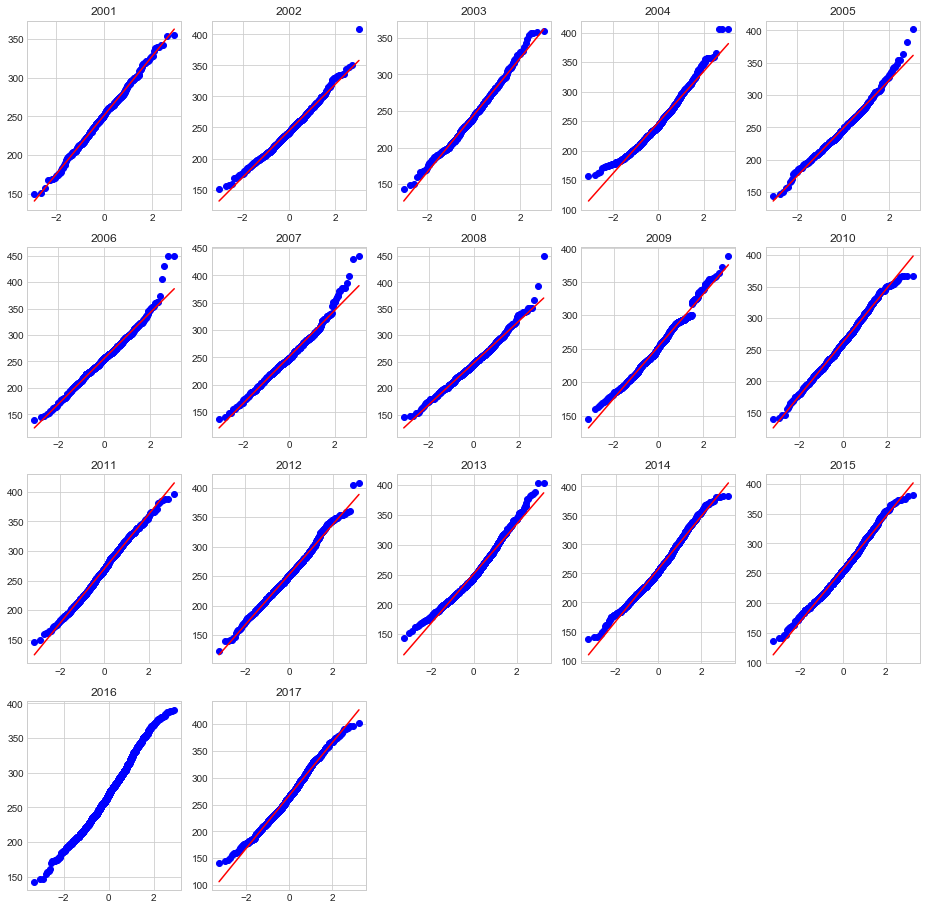

In [27]:
# quantile-quantile plots to compare how normally 
# normally distributed the results from each year are
figure(figsize=(16,16))
for frame in range(17):
    subplot(4,5,frame+1)
    sp.probplot(races[frame]['time'],dist='norm',plot=matplotlib.pyplot)
    xlabel('')
    ylabel('')
    title(str(race_years[frame]))

From here, we can see more of the variation in the data. For most of these races, it does, in fact, look like the finish times are approximately normally distributed, especially toward the middle quantiles. However, in most of these, the normal distribution tends to be a much poorer fit around the edges. This suggests that towards the lower end of times, that is, the faster finishes, there is a lot more clustering. People who are quicker to finish typically will have a harder time than others pushing their time down by a certain amount. These plots build upon the plot that showed minimum, maximum, and average finish times above in that faster runners are more consistent. Conversely, when these quantile-quantile plots tend to trail below the red line at the higher quantiles, this suggests that the slower runners typically have more variable finishing times. Intuitively this makes sense as the people who typically run marathons more often are more consistent in their performance, whereas people who are more likely to be running their first marathon are much less predictable.

## Inference

Although this report does not have time to explore this in detail, the importance of being able to divide these results into more or less normal distributions is of critical importance. Whereas the original data from each year and overall can be fairly messy, there are many statistical tools that can be used to analyze data that is normally distributed. We can use resampling methods to gauge properties of the particular distributions themselves, and then construct confidence intervals and conduct hypothesis tests on those distributions. Theoretically, analyzing the distributions of many different categories that the finish times can be broken down into should yield much more information as to how to predict future runners' finishing times given previous data. 

## Conclusion

There are many different influences that impact the distribution of race results. Often times it takes many different tools to properly tease these factors out. By breaking down data into it's more basic levels and looking for anomalies at every level, the organization and motivation behind a data set can become clearer. In the context of this marathon data, looking at the distribution of times across many races allowed us to see and analyze one of the primary factors that influences the total distribution of finishing times. As a further area of study, one could try to break down the data in other ways according to other irregularities, but with a limited amount of data to work with, there are only so many inferences that can be made. Instead, a natural question now would be to ask questions about how analyzing these different components of racing data could be used in other circumstances where the data being analyzed has somewhat more depth and complexity.

## References 

Athlinks.com, www.athlinks.com/.

Waskom, Michael. “Controlling Figure Aesthetics¶.” Multiple Linear Regression - Seaborn 0.8.1 Documentation, seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles.

Hutchinson, Alex. “How Has the Marathon Changed over Time?” Runner's World, rw.runnersworld.com/marathons/.

Cunningham, Adam. “Adam Cunningham.” Adam Cunningham, University at Buffalo, www.acsu.buffalo.edu/~adamcunn/.

## Code Appendix

In [11]:
import requests as requests
from pandas import *
from glob import glob
import seaborn as sb
import scipy.stats as sp
import re
%pylab inline

# The function scrape_html takes
# as an argument a single given text file
# that contains the HTML of a single page 
# of race data.
#
# It should return a DataFrame that contains 
# the scraped values of the runner's name, city,
# gender, and finish time 

def scrape_html(file_name):
    with open(file_name) as q:
        page = q.read()
    name_tag = '<div class="row" style="flex: 1 1 auto; min-width: 0px; vertical-align: top; max-width: 334px; position: relative;"><div class="col- starter-row"><div class="athName" style="display: block; font-size: 22px; line-height: 1.2em; color: rgb(74, 74, 74); text-decoration: none; max-width: 334px; white-space: nowrap; overflow: hidden; text-overflow: ellipsis;">' 
    time_tag = '<div><!-- react-text: '
    gender_tag = '<span style="display: inline-block; float: left; margin-right: 10px; padding-right: 10px; font-size: 14px; color: rgb(155, 155, 155); border-right: 1px solid rgb(221, 221, 221);"><!-- react-text:'
    division_tag = '<div class="col px-0" style="text-align: center; font-size: 21px; line-height: 1em; max-width: 120px;">'
    
    name_split = page.split(name_tag)
    name_list = []
    for n in range(1,len(name_split)):
        name = name_split[n].split('<')[0]
        name_list.append(name)
        #print(name)
    
    raw_times = re.findall('\d{0,3}:\d{0,3}:\d{0,3}',page)
    times = []
    for time in range(len(raw_times)-2):
        hours = int(raw_times[time].split(':')[0])
        minutes = int(raw_times[time].split(':')[1])
        seconds = int(raw_times[time].split(':')[2])
        minutes_time = hours*60+minutes+seconds/60
        times.append(minutes_time)
        

    gender_split_1 = page.split(gender_tag)
    gender_list = []
    for g in range(1,len(gender_split_1)):
        gender_split_2 = gender_split_1[g].split('<')[0]
        gender = gender_split_2.split('>')[1]
        gender_list.append(gender)
        #print(gender)
    
    
    # Note: the string used to split the HTML is present in front 
    # strings that are not the data we are interested in. These
    # entries are all long strings of garbage, while the splits
    # containing actual data are all shorter than 10 characters,
    # so filtering out longer elements will give us the just the 
    # division place finishes

    division_split = page.split(division_tag)
    #len(division_split)
    dv = division_split
    count = 0
    overall_ranks = []
    gender_ranks = []
    age_group_ranks = []
    for p in range(len(dv)):
        if len(dv[p])<10:
            if count % 3 == 0:
                overall_rank = dv[p].split('<')[0]
                overall_ranks.append(int(overall_rank))   
            elif count % 3 == 1:
                gender_rank = dv[p].split('<')[0]
                gender_ranks.append(int(gender_rank))
            else:
                age_group_rank = dv[p].split('<')[0]
                age_group_ranks.append(int(age_group_rank))
            count += 1
            
    location_tag = '<span id="location">'
    location_split = page.split(location_tag)
    locations = []
    for l in range(1,len(location_split)):
        location = location_split[l].split('<')[0]
        locations.append(location)
        #print(location)
    return name_list,locations, gender_list,overall_ranks,gender_ranks,age_group_ranks,times

# When scraping the actual  webpages, some of the
# race results contain a bib number adjacent to the
# gender, so we will need a separate function to scrape
# the data when the data is in this format. The actual
# bib numbers are not of interest in this analysis

def scrape_html_with_bib(file_name):
    with open(file_name) as q:
        page = q.read()
    name_tag = '<div class="row" style="flex: 1 1 auto; min-width: 0px; vertical-align: top; max-width: 334px; position: relative;"><div class="col- starter-row"><div class="athName" style="display: block; font-size: 22px; line-height: 1.2em; color: rgb(74, 74, 74); text-decoration: none; max-width: 334px; white-space: nowrap; overflow: hidden; text-overflow: ellipsis;">' 
    time_tag = '<div><!-- react-text: '
    gender_tag = '<span style="display: inline-block; float: left; margin-right: 10px; padding-right: 10px; font-size: 14px; color: rgb(155, 155, 155); border-right: 1px solid rgb(221, 221, 221);"><!-- react-text:'
    division_tag = '<div class="col px-0" style="text-align: center; font-size: 21px; line-height: 1em; max-width: 120px;">'
    
    name_split = page.split(name_tag)
    name_list = []
    for n in range(1,len(name_split)):
        name = name_split[n].split('<')[0]
        name_list.append(name)
        #print(name)
    
    raw_times = re.findall('\d{0,3}:\d{0,3}:\d{0,3}',page)
    times = []
    for time in range(len(raw_times)-2):
        hours = int(raw_times[time].split(':')[0])
        minutes = int(raw_times[time].split(':')[1])
        seconds = int(raw_times[time].split(':')[2])
        minutes_time = hours*60+minutes+seconds/60
        times.append(minutes_time)
        
# the actual gender that we need to scrape is every other
# element in the split
    gender_split_1 = page.split(gender_tag)
    gender_list = []
    for g in range(1,len(gender_split_1)):
        if g % 2 == 1:
            gender_split_2 = gender_split_1[g].split('<')[0]
            gender = gender_split_2.split('>')[1]
            gender_list.append(gender)
            #print(gender)
    
    
    # Note: the string used to split the HTML is present in front 
    # strings that are not the data we are interested in. These
    # entries are all long strings of garbage, while the splits
    # containing actual data are all shorter than 10 characters,
    # so filtering out longer elements will give us the just the 
    # division place finishes

    division_split = page.split(division_tag)
    #len(division_split)
    dv = division_split
    count = 0
    overall_ranks = []
    gender_ranks = []
    age_group_ranks = []
    for p in range(len(dv)):
        if len(dv[p])<10:
            if count % 3 == 0:
                overall_rank = dv[p].split('<')[0]
                overall_ranks.append(int(overall_rank))   
            elif count % 3 == 1:
                gender_rank = dv[p].split('<')[0]
                gender_ranks.append(int(gender_rank))
            else:
                age_group_rank = dv[p].split('<')[0]
                age_group_ranks.append(int(age_group_rank))
            count += 1
            
    location_tag = '<span id="location">'
    location_split = page.split(location_tag)
    locations = []
    for l in range(1,len(location_split)):
        location = location_split[l].split('<')[0]
        locations.append(location)
        #print(location)
    return name_list,locations, gender_list,overall_ranks,gender_ranks,age_group_ranks,times

# This function should take the scraped results from
# each page of the results and turn them into a 
# single dataframe

def make_dataframe(file):
    names,locations,genders,overall_ranks,gender_ranks,age_group_ranks,times = scrape_html(file)
    names = DataFrame(names)
    locations = DataFrame(locations)
    genders = DataFrame(genders)
    overall_ranks = DataFrame(overall_ranks)
    gender_ranks = DataFrame(gender_ranks)
    age_group_ranks = DataFrame(age_group_ranks)
    times = DataFrame(times)
    page_dataframe = concat([names,locations,genders,overall_ranks,gender_ranks,age_group_ranks,times],axis=1)
    page_dataframe.columns = ['name','city','gender','Overall Rank','Gender Rank','Age Group Rank','time']
    return page_dataframe

# analogous function to  make_dataframe for
# results with bib numbers

def make_dataframe_with_bib(file):
    names,locations,genders,overall_ranks,gender_ranks,age_group_ranks,times = scrape_html_with_bib(file)
    names = DataFrame(names)
    locations = DataFrame(locations)
    genders = DataFrame(genders)
    overall_ranks = DataFrame(overall_ranks)
    gender_ranks = DataFrame(gender_ranks)
    age_group_ranks = DataFrame(age_group_ranks)
    times = DataFrame(times)
    page_dataframe = concat([names,locations,genders,overall_ranks,gender_ranks,age_group_ranks,times],axis=1)
    page_dataframe.columns = ['name','city','gender','Overall Rank','Gender Rank','Age Group Rank','time']
    return page_dataframe

# This function should take the folder name of
# a folder containing all the text files with 
# the HTML for each page of race results as
# an argument
#
# The function should return a data frame 
# containing all of the results of the 
# Buffalo Marathon for a given year

def assemble_race_data(year):
    files = sorted(glob("C:\\Users\\Matthew\\class_files\\MTH 448 Master Data Folder\\RUN\\Buffalo_Marathon_"+str(year)+"\\pg_*.txt"))
    race_data = make_dataframe(files[0])
    #print(race_data)
    for file in files[1:]:
        next_page = make_dataframe(file)
        race_data = concat([race_data,next_page])
        #print(files) 
    return race_data

# analogous function to assemble_race_data for
# results with bibs
def assemble_race_data_with_bib(year):
    files = sorted(glob("C:\\Users\\Matthew\\class_files\\MTH 448 Master Data Folder\\RUN\\Buffalo_Marathon_"+str(year)+"\\pg_*.txt"))
    race_data = make_dataframe_with_bib(files[0])
    #print(race_data)
    for file in files[1:]:
        next_page = make_dataframe_with_bib(file)
        race_data = concat([race_data,next_page])
        #print(files) 
    return race_data

Populating the interactive namespace from numpy and matplotlib


C:\Users\Matthew\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime', 'unique', 'test', 'plotting']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [12]:
# This block reads all of the scraped data into memory

bm_17 = assemble_race_data(2017)
bm_16 = assemble_race_data(2016)
bm_15 = assemble_race_data_with_bib(2015)
bm_14 = assemble_race_data_with_bib(2014)
bm_13 = assemble_race_data_with_bib(2013)
bm_12 = assemble_race_data_with_bib(2012)
bm_11 = assemble_race_data_with_bib(2011)
bm_10 = assemble_race_data_with_bib(2010)
bm_09 = assemble_race_data_with_bib(2009)
bm_08 = assemble_race_data_with_bib(2008)
bm_07 = assemble_race_data_with_bib(2007)
bm_06 = assemble_race_data_with_bib(2006)
bm_05 = assemble_race_data_with_bib(2005)
bm_04 = assemble_race_data_with_bib(2004)
bm_03 = assemble_race_data_with_bib(2003)
bm_02 = assemble_race_data_with_bib(2002)
bm_01 = assemble_race_data_with_bib(2001)

# forms a dataframe containing every single entry from all the 
# years that were scraped
races = [bm_17,bm_16,bm_15,bm_14,bm_13,bm_12,bm_11,bm_10,bm_09,bm_08,bm_07,bm_06,bm_05,bm_04,bm_03,bm_02,bm_01]
races = races[::-1]
all_races = concat(races)
race_years = [2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

# computes summary statistics for each race
counts = []
avgs = []
sds = []
mins = []
maxs = []
diffs = []
for s in races:
    summary = s['time'].describe()
    counts.append(summary[0])
    avgs.append(summary[1])
    sds.append(summary[2])
    mins.append(summary[3])
    maxs.append(summary[7])
    diffs.append(summary[4]-summary[3])

Text(0.5,1,'Number of Runners for Each Race Year')

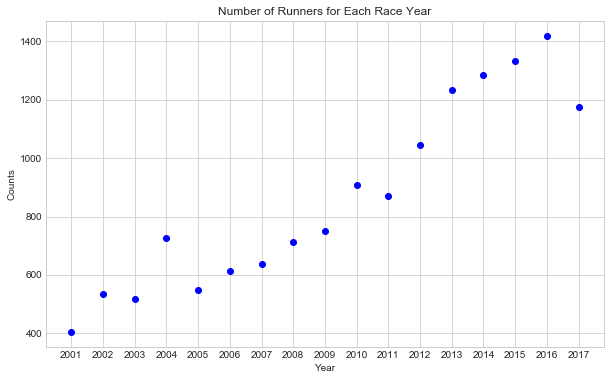

In [28]:
# visualizes how many runners there are for each year

figure(figsize=(10,6))
plot(counts,'b.',ms=12)
xticks(x,race_years)
xlabel('Year')
ylabel('Counts')
title('Number of Runners for Each Race Year')

Text(0.5,1,'Standard Deviation of Each Race Year')

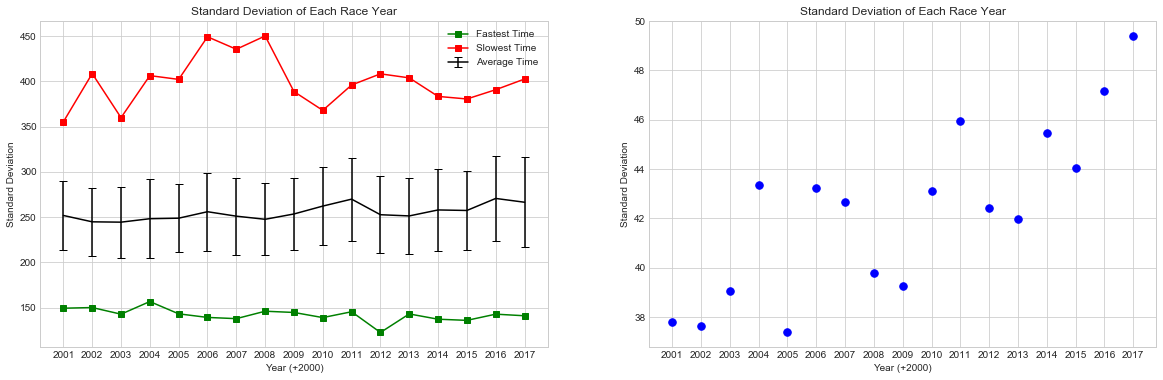

In [14]:
sb.set_style('whitegrid')
figure(figsize=(20,6))
subplot(1,2,1)
plot(mins,'gs',linestyle='solid',label='Fastest Time')
plot(maxs,'rs',linestyle='solid',label='Slowest Time')
errorbar(x,avgs,yerr=sds,color='k',label='Average Time',capsize=4)
legend()
xticks(x,race_years)
xlabel('Year (+2000)')
ylabel('Standard Deviation')
title('Standard Deviation of Each Race Year')
subplot(1,2,2)
plot(sds,'b.',ms=15)
xticks(x,race_years)
xlabel('Year (+2000)')
ylabel('Standard Deviation')
title('Standard Deviation of Each Race Year')

The mean =256.752959967


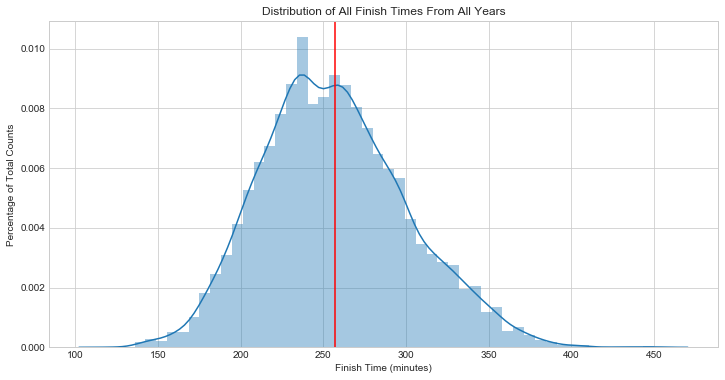

In [15]:
# Distribution of all finish times 
# from all races
figure(figsize=(12,6))
sb.distplot(all_races['time'].dropna(how='any'))
title('Distribution of All Finish Times From All Years')
xlabel('Finish Time (minutes)')
ylabel('Percentage of Total Counts')
a = all_races['time'].dropna(how='any').describe()[1] 
print('The mean ='+str(a))
axvline(a,color='r')

C:\Users\Matthew\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'2001')

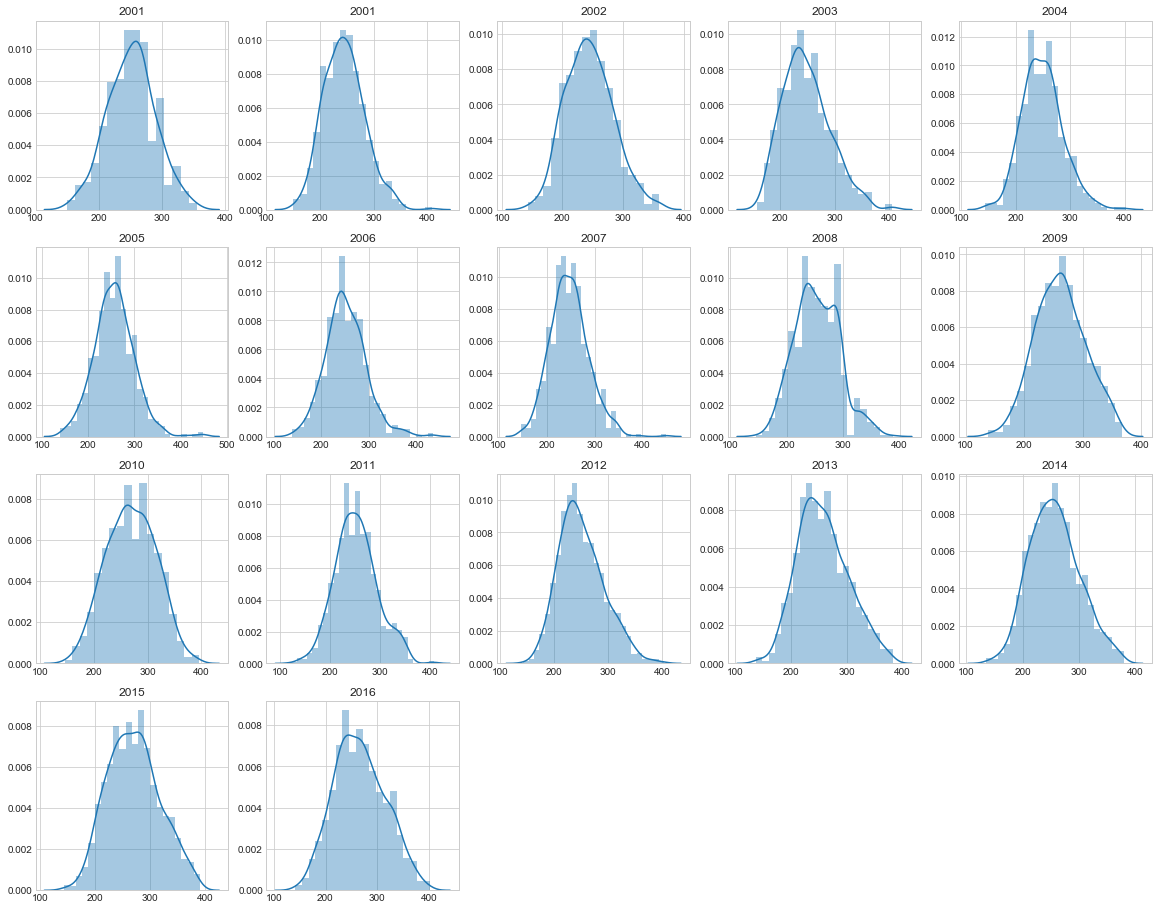

In [16]:
# Distributions of all the individual 
# race years

figure(figsize=(20,16))
rl = 1
for race_dist in races:
    subplot(4,5,rl)
    #print(type(race_dist))
    rd = race_dist['time'].dropna(how='any')
    sb.distplot(rd)
    xlabel('')
    ylabel('')
    title(str(race_years[rl-2]))
    rl += 1
# The naming of subplots wasn't working 
# exactly correctly, so the first subplot is renamed manually

subplot(4,5,1)
title('2001')

C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Text(0.5,1,'Quantile-Quantile Plot of Every Time From Every Race')

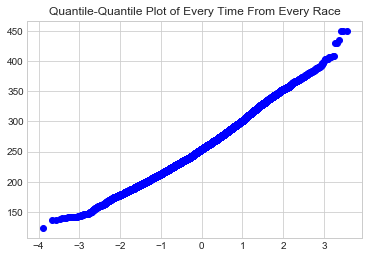

In [17]:
sp.probplot(all_races['time'],dist='norm',plot=matplotlib.pyplot)
xlabel('')
ylabel('')
title('Quantile-Quantile Plot of Every Time From Every Race')

C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


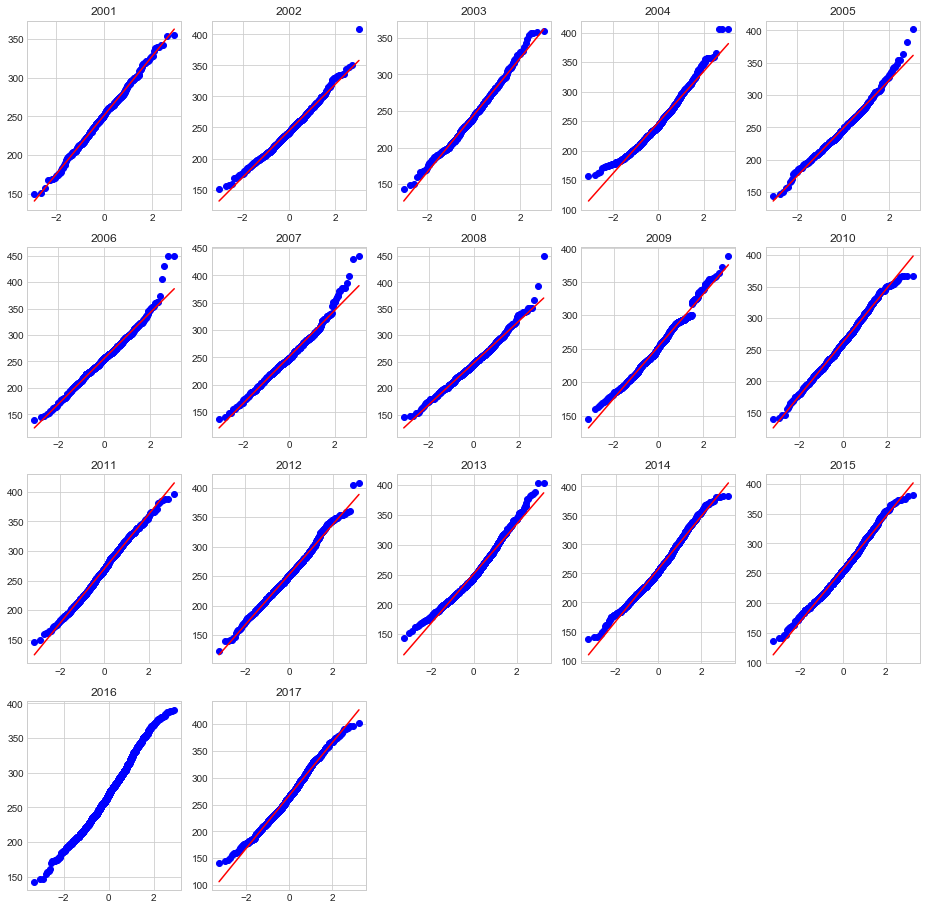

In [18]:
# quantile-quantile plots to compare how normally 
# normally distributed the results from each year are
figure(figsize=(16,16))
for frame in range(17):
    subplot(4,5,frame+1)
    sp.probplot(races[frame]['time'],dist='norm',plot=matplotlib.pyplot)
    xlabel('')
    ylabel('')
    title(str(race_years[frame]))

Text(0,0.5,'Percentage of Total Counts')

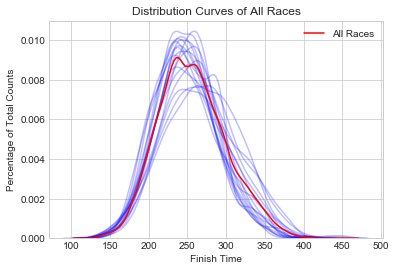

In [19]:
# Visualization of the distributions
# of times from each race as well as
# the aggregated races

ld = 0
for race_dist in races:
    #print(type(race_dist))
    ld = race_dist['time'].dropna(how='any')
    sb.kdeplot(ld,color='b',alpha=.25,label='')
    xlabel('')
    ylabel('')
    #title(str(race_years[ld]+2000))
    ld += 1
sb.kdeplot(all_races['time'].dropna(how='any'),color='r',label='All Races')
title('Distribution Curves of All Races')
xlabel('Finish Time')
ylabel('Percentage of Total Counts')

Text(0,0.5,'Percentage of Total Counts')

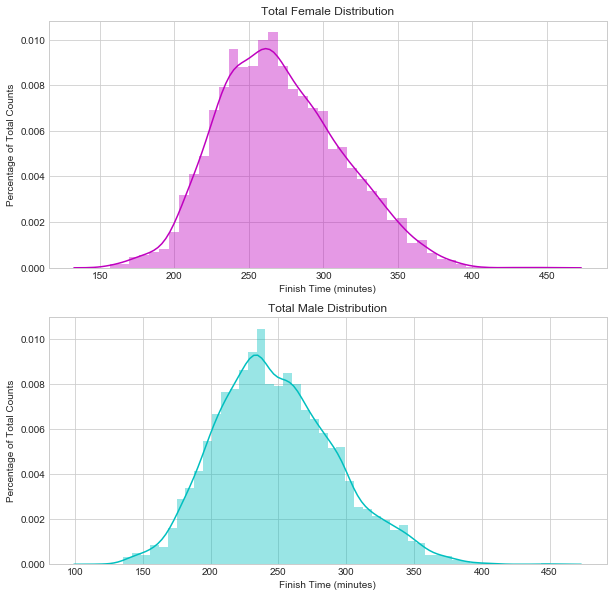

In [29]:
males = all_races[all_races['gender']=='M']
females = all_races[all_races['gender']=='F']
figure(figsize=(10,10))
subplot(2,1,1)
sb.distplot(females['time'].dropna(how='any'),color='m')
title('Total Female Distribution')
xlabel('Finish Time (minutes)')
ylabel('Percentage of Total Counts')
subplot(2,1,2)

sb.distplot(males['time'].dropna(how='any'),color='c')
title('Total Male Distribution')
xlabel('Finish Time (minutes)')
ylabel('Percentage of Total Counts')


count    8054.000000
mean      248.945507
std        44.327012
min       122.616667
25%       217.262500
50%       244.841667
75%       277.466667
max       450.000000
Name: time, dtype: float64

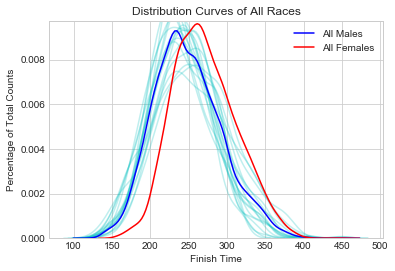

In [30]:
# Visualization of the distributions
# of times from each race as well as
# the aggregated races
#
# The cyan curves are the individual year
# distributions for men and the solid blue 
# is the total distribution for men.
#
# The red is the distribution for all women 
# and is included to show how it impacts the
# peaks of the total distribution for all
# finish times

ld = 0
for race_dist in races:
    #print(type(race_dist))
    ml = race_dist[race_dist['gender']=='M']
    ld = ml['time'].dropna(how='any')
    sb.kdeplot(ld,color='c',alpha=.25,label='')
    xlabel('')
    ylabel('')
    #title(str(race_years[ld]+2000))
    ld += 1
sb.kdeplot(males['time'].dropna(how='any'),color='b',label='All Males')
sb.kdeplot(females['time'].dropna(how='any'),color='r',label='All Females')
title('Distribution Curves of All Races')
xlabel('Finish Time')
ylabel('Percentage of Total Counts')
males['time'].describe()

count    4931.000000
mean      270.966356
std        41.326807
min       156.500000
25%       240.575000
50%       267.133333
75%       298.425000
max       449.083333
Name: time, dtype: float64

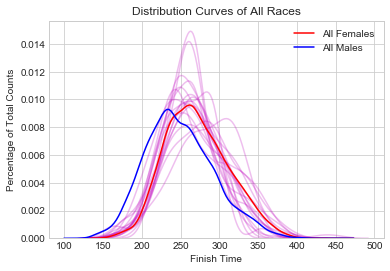

In [32]:
# Visualization of the distributions
# of times from each race as well as
# the aggregated races
#
# Red curve is total female distribution,
# magenta are the female distributions for
# each year, and the blue is the distribution 
# for all men, included here to show how it 
# impacts the twin-peaks in the total distibution

ld = 0
for race_dist in races:
    #print(type(race_dist))
    fl = race_dist[race_dist['gender']=='F']
    ld = fl['time'].dropna(how='any')
    sb.kdeplot(ld,color='m',alpha=.25,label='')
    xlabel('')
    ylabel('')
    #title(str(race_years[ld]+2000))
    ld += 1
sb.kdeplot(females['time'].dropna(how='any'),color='r',label='All Females')
sb.kdeplot(males['time'].dropna(how='any'),color='b',label='All Males')
title('Distribution Curves of All Races')
xlabel('Finish Time')
ylabel('Percentage of Total Counts')
females['time'].describe()